<a href="https://colab.research.google.com/github/Tanisha020/Vehicle-Number-Plate-Detection/blob/main/Vehicle_number_plate_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

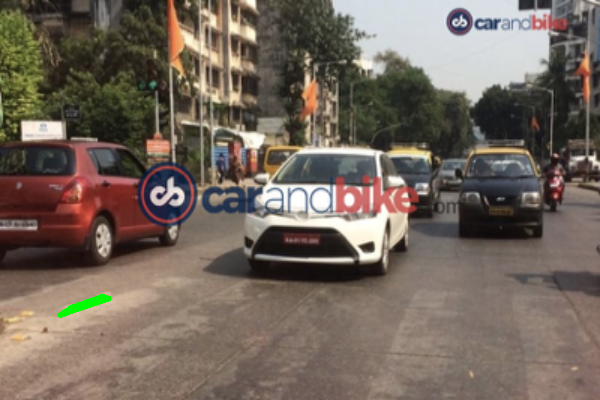

Number plate detected.


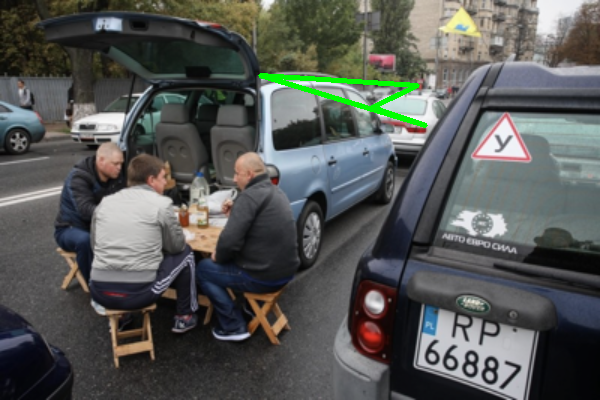

Number plate detected.


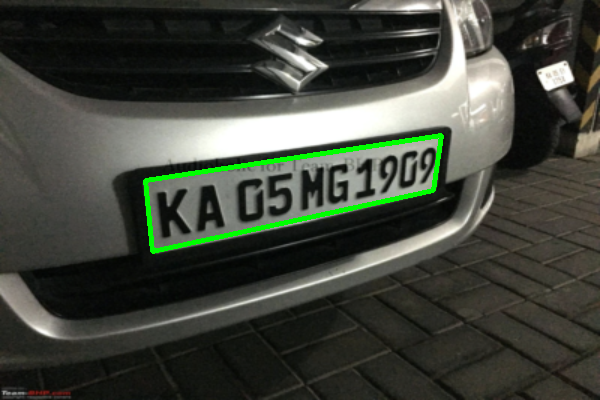

Number plate detected.


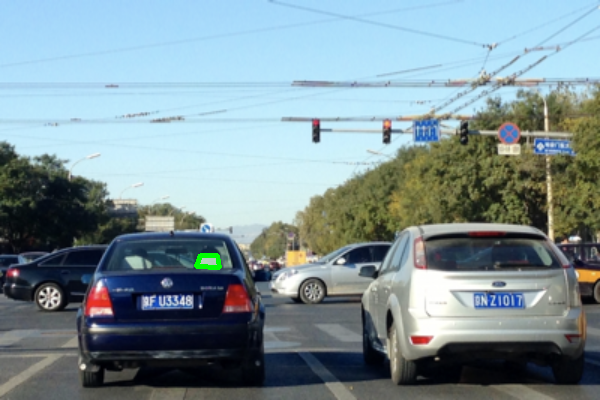

Number plate detected.


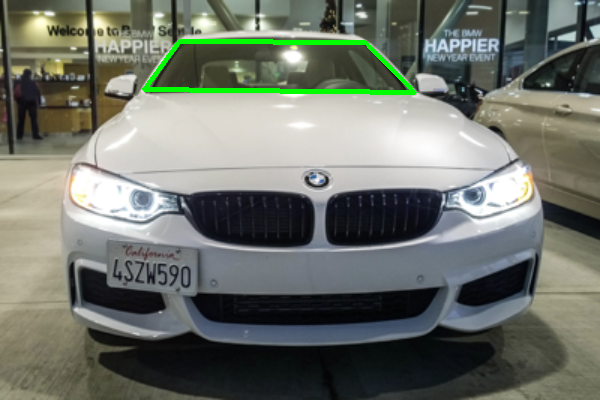

Number plate detected.


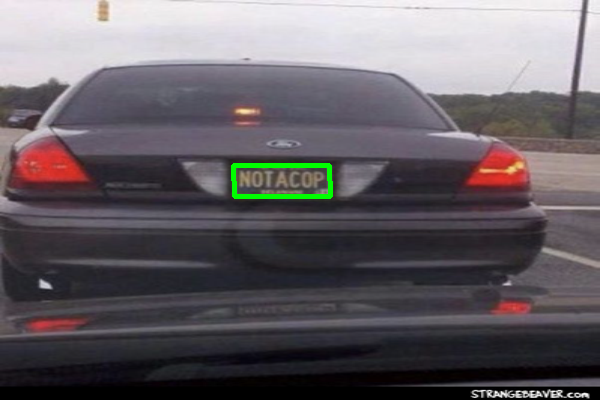

Number plate detected.


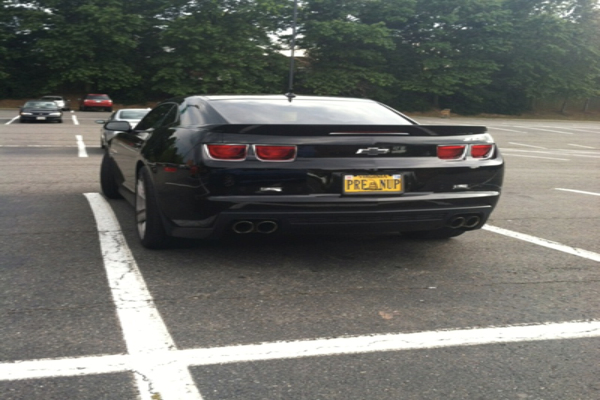

No number plate detected in this image.


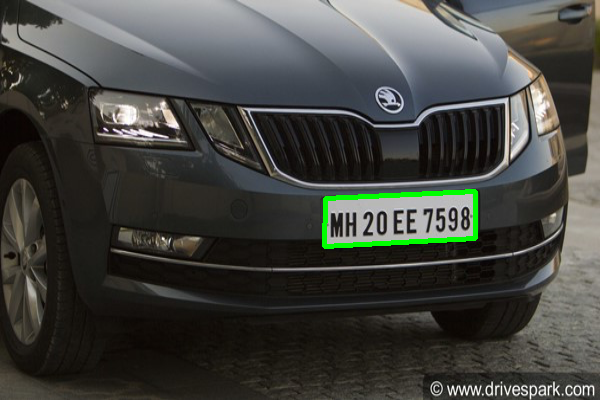

Number plate detected.


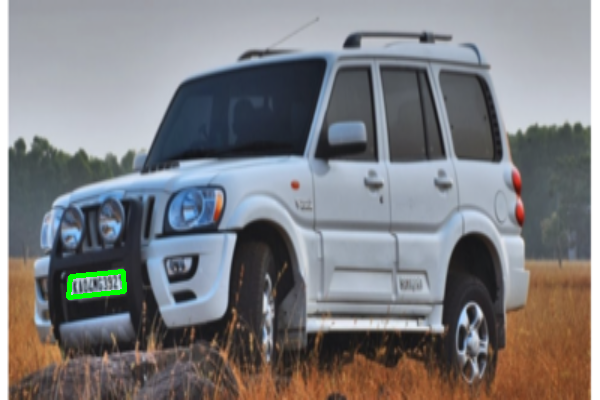

Number plate detected.


In [38]:
import cv2
import imutils
import numpy as np
from google.colab.patches import cv2_imshow

def detect_number_plate(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)

    edges = [
        cv2.Canny(gray, 50, 150),
        cv2.Canny(gray, 30, 200),
        cv2.Canny(gray, 20, 100),
    ]

    thresh_layers = [
        cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2),
        cv2.threshold(cv2.GaussianBlur(gray, (5, 5), 0), 180, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1],
    ]

    for edged in edges:
        if detect_plate_in_edges(img.copy(), edged, min_area=200, max_area=50000, aspect_ratio_range=(1, 6)):
            return

    for thresh in thresh_layers:
        if detect_plate_in_edges(img.copy(), thresh, min_area=200, max_area=50000, aspect_ratio_range=(1, 6)):
            return

    cv2_imshow(img)
    print("No number plate detected in this image.")

def detect_plate_in_edges(img, edged, min_area, max_area, aspect_ratio_range):
    contours = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)

    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1] + cv2.boundingRect(c)[3], reverse=True)

    for c in contours:
        perimeter = cv2.arcLength(c, True)
        points = cv2.approxPolyDP(c, 0.02 * perimeter, True)

        if len(points) == 4:
            x, y, w, h = cv2.boundingRect(points)
            aspect_ratio = w / float(h)

            area = cv2.contourArea(c)
            if (aspect_ratio_range[0] <= aspect_ratio <= aspect_ratio_range[1] and
                min_area < area < max_area):

                if not is_too_close_to_edges(x, y, w, h, img.shape):
                    cv2.drawContours(img, [points], -1, (0, 255, 0), 3)
                    cv2_imshow(img)
                    print("Number plate detected.")
                    return True
    return False

def is_too_close_to_edges(x, y, w, h, img_shape):
    margin = 10
    height, width = img_shape[:2]
    return x < margin or y < margin or x + w > width - margin or y + h > height - margin

def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (600, 400))
    detect_number_plate(img)

for i in range(1, 10):
    image_path = f'/content/drive/MyDrive/Colab Notebooks/ANPR Test/Cars{i}.png'
    process_image(image_path)
    cv2.waitKey(0)

cv2.destroyAllWindows()
